## Final Project Submission

Please fill out:
* Student name: Sarah Hodash
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


The King County housing set has a list of homes in the city with id numbers and columns with various identifying factors for each. In this project, I seek to find a relationship between one or more of the factors and the price of the house. At an inital look, I expect the size of the home to be one of the stronger variables.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("kc_house_data.csv") 

In [2]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Find null values

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
print('Percentage of Null Cabin Values:', len(data[data.yr_renovated.isna()])/ len(data))


Percentage of Null Cabin Values: 0.17789507802009538


replace null values in the waterfront column with 0 - the assumption here is that the home is either on the water or is not and I've assumed null values are not on the water

In [7]:
for col in ['waterfront','view']:
    print('Values for {}:\n{}\n\n'.format(col, data[col].unique()))

Values for waterfront:
[nan  0.  1.]


Values for view:
[ 0. nan  3.  4.  2.  1.]




In [8]:
data['waterfront'] = data['waterfront'].fillna(value=0)

replace null values with 0 for view column, similar assumption as the waterfront column, treat null values as having not been seen

In [9]:
data['view'] = data['view'].fillna(value=0)

In [10]:
data['yr_renovated'] = data['yr_renovated'].fillna(value=0)

In [11]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

check for duplicates

In [12]:
duplicates = data[data.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


check for irregular values

In [13]:
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

check how many ? there are in sqft basement column

In [14]:
data.sqft_basement.value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
65.0      0.000046
588.0     0.000046
3480.0    0.000046
2400.0    0.000046
2196.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [15]:
data[data.sqft_basement != '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


delete rows that have a ? in the sqft basement column

In [16]:
data.sqft_basement = data.sqft_basement.replace({'?': np.nan}).dropna().astype(str)

In [17]:
data.sqft_basement.value_counts(normalize=True)

0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
            ...   
2300.0    0.000047
1930.0    0.000047
666.0     0.000047
274.0     0.000047
2196.0    0.000047
Name: sqft_basement, Length: 303, dtype: float64

End of data cleaning

Data Visualization: Look at the relationship between price and several factors

year built, sqft, condition, neighboring plots

I would expect a linear relationship between the size (sqft) of a house and the price, so let's test this out in a plot. Similary, is there a strong relationship between the price of a house and the size of the homes around it? Bigger homes may indicate a nicer neighborhood overall so home prices might generally be higher. I wonder if there is a relationship between the condition of the house and price? Similar to neighboring housing sizes, the condition could be indicative of a nice area but I don't expect there to be a strong relationship. Finally, are newer houses more expensive? Let's see if there is a strong relationship between year built and price. I also want to explore the location of the homes as I believe that would have a relatively strong impact on price.

In [18]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

Data Visualization

Are larger homes more expensive? Additionally, are homes on the water typically more expensive?

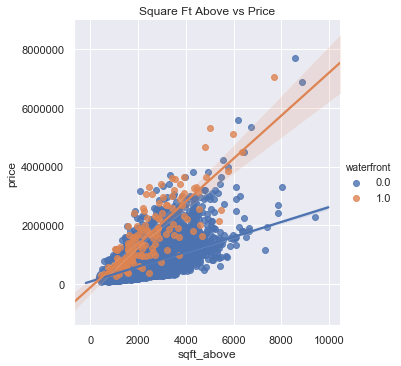

In [19]:
sns.lmplot(x="sqft_above", y="price", hue="waterfront", data=data).set(title = 'Square Ft Above vs Price');

There appears to be a linear relationship between sqft_above and price and homes on the waterfront (value of 1) appear to generally have higher prices as well. 

Exploring zip code data

In [20]:
data.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

I don't believe a simple scatter plot would show much of a relationship so here I group data set by zipcode, looking at the top zipcodes by price and what the average house looks like. 

In [21]:
grouped_df = data.groupby('zipcode').mean()
grouped_df.nlargest(10, ['price']) 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,,
98039,3.755708e+09,2.161300e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.020000,0.440000,3.480000,9.560000,3290.900000,1972.520000,358.720000,47.625840,-122.233540,3132.200000,17291.100000
98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,1971.470032,176.671924,47.616183,-122.205189,2674.700315,12805.022082
98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.039007,0.765957,3.787234,8.960993,2474.329787,1971.471631,205.336879,47.559846,-122.225592,2898.744681,12801.283688
98112,4.826282e+09,1.096239e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,0.148699,3.516729,8.442379,2005.695167,1944.449814,156.107807,47.629619,-122.297866,2280.078067,4898.159851
98102,4.102040e+09,8.996077e+05,3.250000,2.283654,2151.048077,3605.153846,1.990385,0.000000,0.153846,3.375000,8.298077,1752.442308,1952.163462,76.576923,47.634591,-122.322250,1954.471154,3303.500000
98109,3.458919e+09,8.800778e+05,3.192661,2.158257,2054.779817,3621.082569,1.729358,0.000000,0.477064,3.477064,8.018349,1637.348624,1944.027523,128.761468,47.635602,-122.350092,1928.348624,3605.724771
98105,5.282206e+09,8.632289e+05,3.580786,2.159389,2150.576419,5121.165939,1.591703,0.013100,0.305677,3.628821,7.838428,1693.458515,1940.406114,122.200873,47.665067,-122.294341,2028.624454,4939.017467
98006,4.621241e+09,8.599386e+05,3.841365,2.555723,2888.295181,13383.435743,1.459839,0.008032,0.630522,3.658635,8.795181,2300.383534,1978.720884,68.333333,47.558022,-122.146839,2785.612450,12159.959839
98119,4.303215e+09,8.497148e+05,3.260870,2.224185,2005.614130,3615.217391,1.793478,0.000000,0.548913,3.375000,8.021739,1589.961957,1947.619565,173.673913,47.640034,-122.366918,1865.434783,3727.494565


Exploring the relationship between condition and price, if any. Given there are only 5 categories for condition, I chose to look at a box plot to see the range of the data and any relationships.

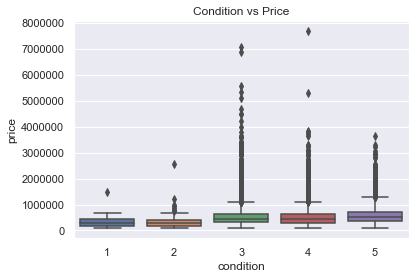

In [22]:
ax = sns.boxplot(x="condition", y="price", data=data).set(title = 'Condition vs Price')

In [23]:
data.condition.value_counts(normalize=True)

3    0.649164
4    0.262861
5    0.078761
2    0.007871
1    0.001343
Name: condition, dtype: float64

Note on condition: many more instances of 3 or 4 rated houses, but the average price does appear to be a big higher for better (higher) conditions

Price vs. year built- are newer homes more expensive, or is the opposite more true?

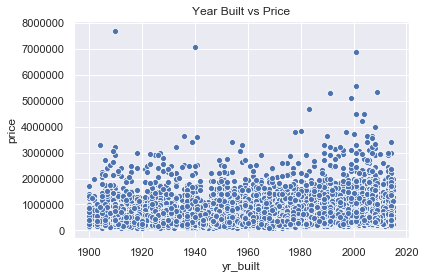

In [24]:
ax = sns.scatterplot(x="yr_built", y="price", data=data).set(title = 'Year Built vs Price')

There does not appear to be a linear relationship between year built and price

Similar to the first plot, let's compare sqft_living vs price without any other variables.

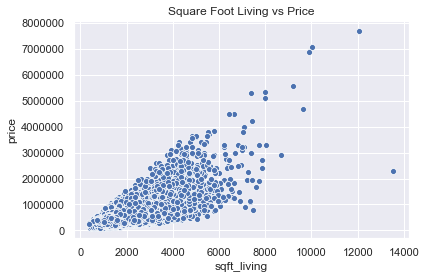

In [25]:
ax = sns.scatterplot(x="sqft_living", y="price", data=data).set(title = 'Square Foot Living vs Price')

This appears to be the strongest linear relationship so far (sqft_living and price)

Is there as strong of a relationship between the price of a home and the size of homes in the surrounding area?

In [26]:
from matplotlib import style
style.use('ggplot')
%matplotlib inline

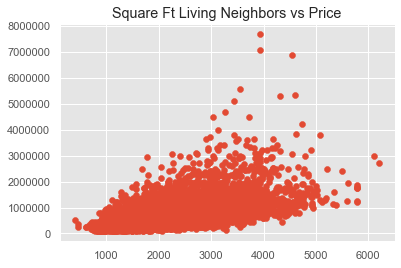

In [27]:
plt.scatter(data.sqft_living15, data.price)
plt.title('Square Ft Living Neighbors vs Price')
plt.show()

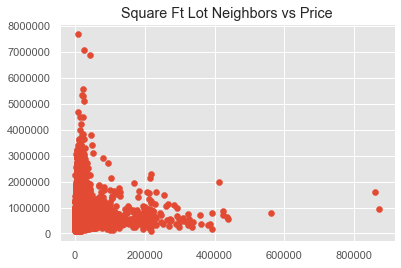

In [28]:
plt.scatter(data.sqft_lot15, data.price)
plt.title('Square Ft Lot Neighbors vs Price')
plt.show()

There seems to be a similar relationship between sqft_living vs price and sqft_living15 vs price, though perhaps not as strong, while sqft_lot15 (property size) does not have a strong linearity with price

Given the strong linear visual between sqft_living and price, these will be the columns used in the linear regression model to test the strength of this relationship

In [29]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [39]:
f = 'price~sqft_living'

In [40]:
model = ols(formula=f, data=data).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:30:35   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared of 0.493 does show a relationship exists between sqft_living and price but it is not especially strong

Exploring a regression model with multiple variables 

Looking at correlations between variables

In [33]:
data_pred = data.iloc[:,3:23]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [34]:
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077


In [35]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


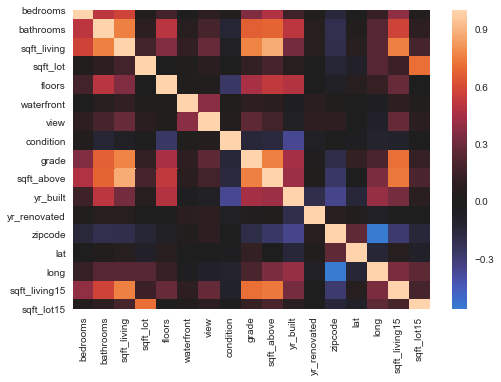

In [36]:
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

Some expected correlation between the different measures of square footage 

Somewhat strong correlation between number of bathrooms and sqft_living, as well as grade and sqft_living

Run a regression predicting price based on sqft_living, waterfront and condition

In [73]:
formula = "price ~ sqft_living+waterfront+condition"
model = ols(formula= formula, data=data).fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8279.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:42:54   Log-Likelihood:            -2.9912e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.786e+05   1.01e+04    -17.654      0.000   -1.98e+05   -1.59e+05
sqft_living   274.6070      1.871    146.785      0.000     270.940     278.274
waterfront   8.575e+05   2.09e+04     40.976      0.000    8.16e+05    8.99e+05
condition     4.16e+04   2626.112     15.841      0.000    3.65e+04    4.67e+04
==============================================================================
Omnibus:                    13445.792   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           444311.006
Skew:                           2.471   Prob(JB):                         0.00
Kurtosis:                      24.664   Cond. No.                     2.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared value of 0.535 is higher than the single variable regression, indicating an improved model, but the value still does not suggest this is an especially strong model 

Takeaways: there does appear to be a linear relationship between sqft and price within the Boston housing set, but the models created are not especially strong given R-squared values of 0.493 and 0.535. The multiple variable regression slightly improved the r-squared value, but not by much. This could be due to slight correlations between the values or that there could be stronger factors in the dataset or elsewhere to predict price.

Limitations and Next Steps: the r-squared values are not especially strong, suggesting these models aren't very strong. One next step could be to look into the locations of the houses. Do different zip codes have higher prices? Do these variables become stronger/weaker when looking into specific zip codes?

In [111]:
formula = "price ~ sqft_living+grade+bathrooms+waterfront+yr_renovated+view"
model = ols(formula= formula, data=data).fit()

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     5288.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:05:07   Log-Likelihood:            -2.9763e+05
No. Observations:               21597   AIC:                         5.953e+05
Df Residuals:                   21590   BIC:                         5.953e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.642e+05   1.25e+04    -45.053      0.000   -5.89e+05    -5.4e+05
sqft_living    179.2472      3.163     56.675      0.000     173.048     185.446
grade         1.009e+05   2152.495     46.895      0.000    9.67e+04    1.05e+05
bathrooms    -3.129e+04   3238.444     -9.662      0.000   -3.76e+04   -2.49e+04
waterfront    6.098e+05    2.1e+04     29.014      0.000    5.69e+05    6.51e+05
yr_renovated    70.8761      4.399     16.112      0.000      62.254      79.499
view          6.778e+04   2343.256     28.925      0.000    6.32e+04    7.24e+04
==============================================================================
Omnibus:                    15685.327   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           923152.843
Skew:                           2.914   Prob(JB):                         0.00
Kurtosis:                      34.494   Cond. No.                     3.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""